## Regression 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
# Loading the data into jupyterlab
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [9]:
# Reading the data into pandas dataframe
df=pd.read_csv(path)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [10]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
## Data Exploration 


In [12]:
#summary statistics with describe
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
#selecting few features 
cdf = df[['ENGINESIZE', 'CYLINDERS', "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


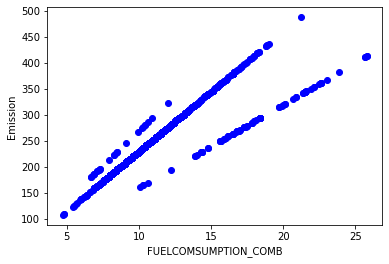

In [14]:
# Checking for relationship with scatter plot
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCOMSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

The above shows that fuel consumption has a postive relationship with emission.


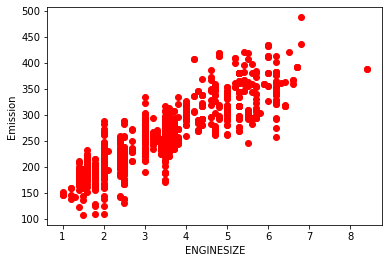

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

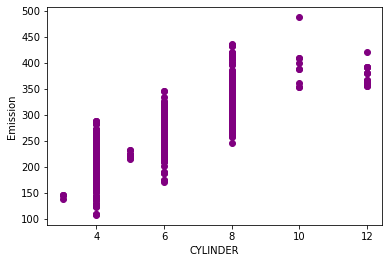

In [20]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='purple')
plt.xlabel("CYLINDER")
plt.ylabel("Emission")
plt.show()

In [23]:
#Creating a train/test split and create a mask to select random rows using np.random.rand()
msk = np.random.rand(len(df))< 0.8

train = cdf[msk]
test =cdf[~msk]

Plotting Train Distribution


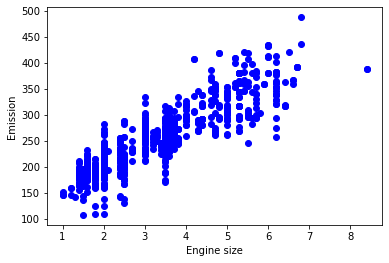

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Modeling with SKLEARN

In [25]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regression.fit(train_x,train_y)

LinearRegression()

In [26]:
print("Coeffients: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coeffients:  [[39.17755464]]
Intercept:  [125.77837301]


## Plot Outputs

Text(0, 0.5, 'Emission')

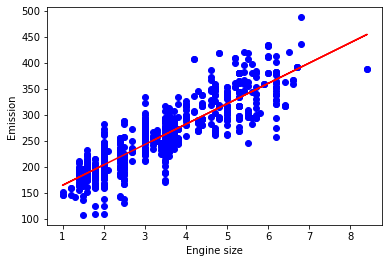

In [29]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [33]:
from  sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regression.predict(test_x)


In [34]:
print ("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 24.74
Residual sum of squares (MSE): 1002.02
R2-score: 0.72


In [36]:
# for fuel consumption
train_x = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
test_x = np.asanyarray(test[["FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regression.fit(train_x,train_y)

LinearRegression()

In [37]:
test_y_ = regression.predict(test_x)

In [38]:
print ("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 18.58
Residual sum of squares (MSE): 648.34
R2-score: 0.82


 ## Multiple Regression Model

In [39]:
from sklearn import linear_model

In [45]:
reg = linear_model.LinearRegression()
x = np.asanyarray(train[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[["CO2EMISSIONS"]])
reg.fit(x, y)
# the coefficients
print("Coefficients: ", reg.coef_)

Coefficients:  [[11.39356926  7.81673618  9.06483631]]


## Prediction

In [54]:
y_hat =reg.predict(test[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[["ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum pf sequares: %.2f' % np.mean(y_hat -y)**2)
print('Variance score: %2f' % reg.score(x,y))

Residual sum pf sequares: 0.00
Variance score: 0.860934
